In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función (En este caso se usará AM2 con RK4 para sacar los primeros valores)

def AM2(f, q, y0, v0, t0, tf, h):
    n = int((tf - t0)/ h)
    rng = np.linspace(t0, tf, n + 1)
    
    y_values = np.zeros(n+1, dtype = float)
    y_values[0] = y0
    v_values = np.zeros(n+1, dtype = float)
    v_values[0] = v0

    m = 1 # para sacar solo una solución extra y tener las soluciones inciales y0 y y1; v0 y v1

    for i in range(m):
        k1 = h * f(y_values[i], v_values[i], rng[i])
        l1 = h * q(y_values[i], v_values[i], rng[i])
        
        k2 = h * f(y_values[i] + 0.5 * k1, v_values[i] + 0.5 * l1, rng[i] + 0.5 * h)
        l2 = h * q(y_values[i] + 0.5 * k1, v_values[i] + 0.5 * l1, rng[i] + 0.5 * h)
        
        k3 = h * f(y_values[i] + 0.5 * k2, v_values[i] + 0.5 * l2, rng[i] + 0.5 * h)
        l3 = h * q(y_values[i] + 0.5 * k2, v_values[i] + 0.5 * l2, rng[i] + 0.5 * h)
        
        k4 = h * f(y_values[i] + k3, v_values[i] + l3, rng[i] + h)
        l4 = h * q(y_values[i] + k3, v_values[i] + l3, rng[i] + h)

        y_values[i+1] = y_values[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        v_values[i+1] = v_values[i] + (1/6) * (l1 + 2*l2 + 2*l3 + l4)

    for i in range(m,n):
        y_pred = y_values[i] + 0.5 * h * (3*f(y_values[i], v_values[i], rng[i]) - f(y_values[i-1], v_values[i-1], rng[i-1]))
        v_pred = v_values[i] + 0.5 * h * (3*q(y_values[i], v_values[i], rng[i]) - q(y_values[i-1], v_values[i-1], rng[i-1]))
        y_values[i+1] = y_values[i] + (1/12)*h * (5*f(y_pred, v_pred, rng[i+1]) + 8*f(y_values[i], v_values[i], rng[i]) - f(y_values[i-1], v_values[i-1], rng[i-1]))
        v_values[i+1] = v_values[i] + (1/12)*h * (5*q(y_pred, v_pred, rng[i+1]) + 8*q(y_values[i], v_values[i], rng[i]) - q(y_values[i-1], v_values[i-1], rng[i-1]))
    return y_values, v_values, rng

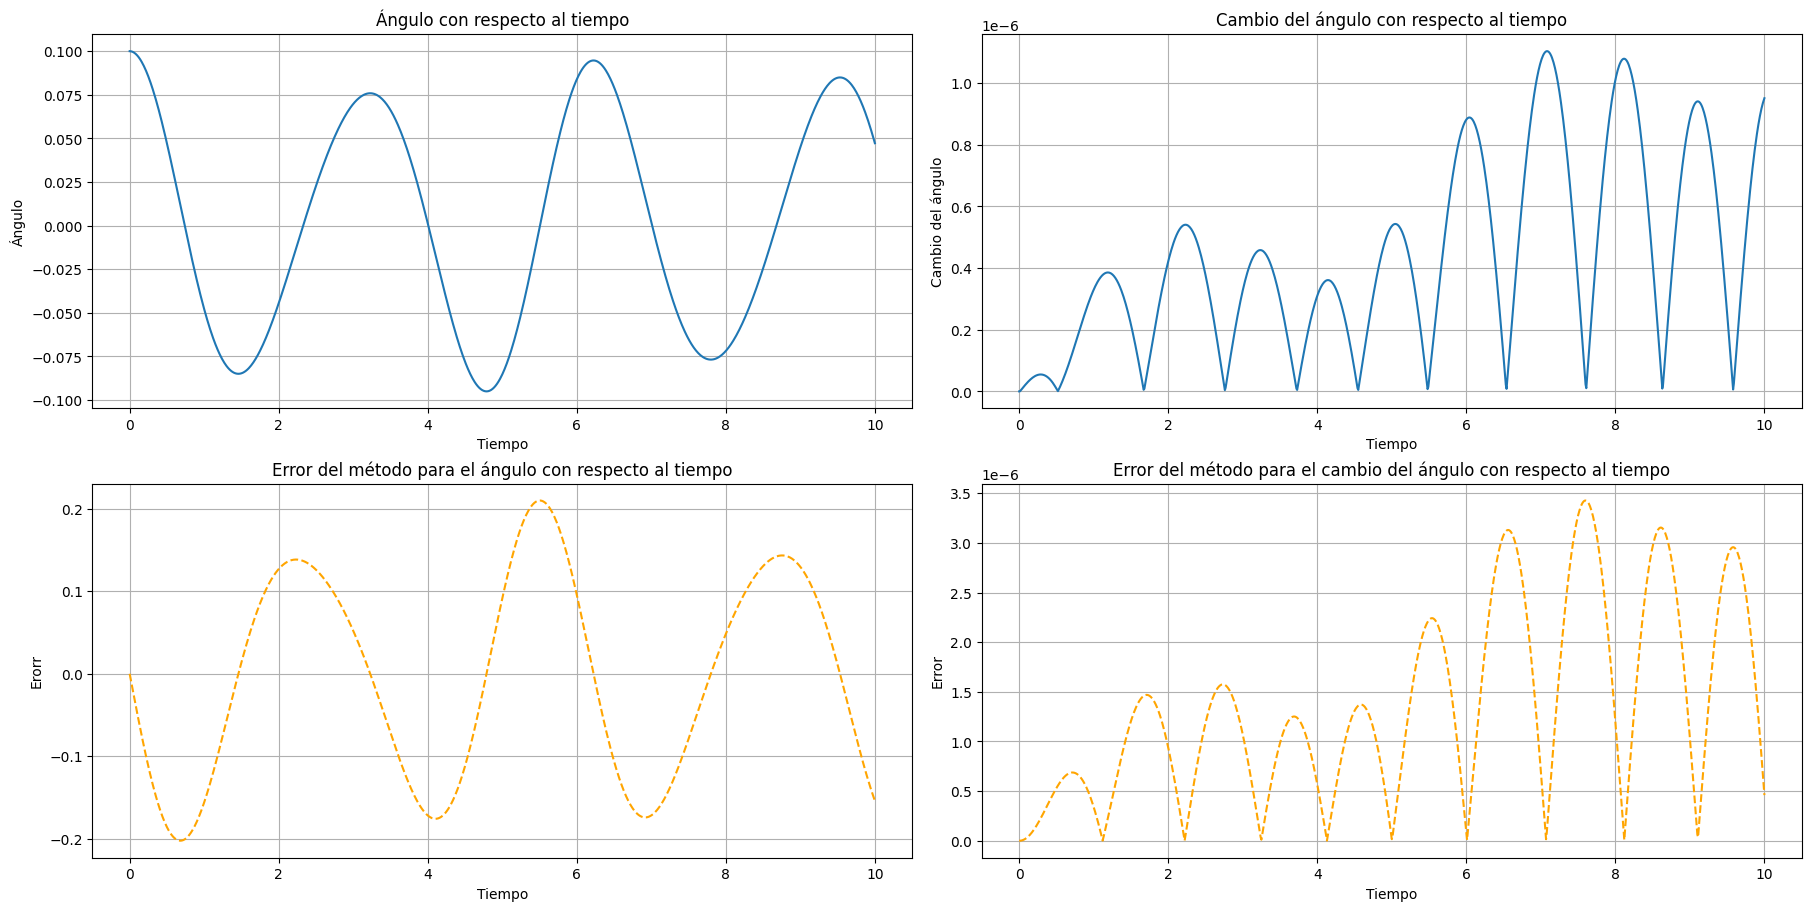

In [4]:
m = 2
L = 1
b = 0.1
g = 9.8
F0 = 1
w = 2
h = 0.01

t0 = 0
tf = 10
n = int((tf - t0)/ h)

theta0 = 0.1
v0 = 0

f = lambda theta, v, t: v
q = lambda theta, v, t: (F0*np.cos(w*t) - b*v - m*g*np.sin(theta))/(m*L)

y_v, v_v, t_v = AM2(f, q, theta0, v0, t0, tf, h)
y_m, v_m, t_m = AM2(f, q, theta0, v0, t0, tf, h/2)

y_interpolate = y_m[::2]
y_error = np.abs(y_interpolate - y_v)
v_interpolate = v_m[::2]
v_error = np.abs(v_interpolate - v_v)

fig, ax = plt.subplots(2, 2, figsize = (18, 9), layout = 'constrained')

ax[0, 0].plot(t_v, y_v)
ax[0, 0].set_xlabel('Tiempo')
ax[0, 0].set_ylabel('Ángulo')
ax[0, 0].set_title('Ángulo con respecto al tiempo')
ax[0, 0].grid()

ax[0, 1].plot(t_v, y_error)
ax[0, 1].set_xlabel('Tiempo')
ax[0, 1].set_ylabel('Cambio del ángulo')
ax[0, 1].set_title('Cambio del ángulo con respecto al tiempo')
ax[0, 1].grid()

ax[1, 0].plot(t_v, v_v, ls = '--', color = 'orange')
ax[1, 0].set_xlabel('Tiempo')
ax[1, 0].set_ylabel('Erorr')
ax[1, 0].set_title('Error del método para el ángulo con respecto al tiempo')
ax[1, 0].grid()

ax[1, 1].plot(t_v, v_error, ls = '--', color = 'orange')
ax[1, 1].set_xlabel('Tiempo')
ax[1, 1].set_ylabel('Error')
ax[1, 1].set_title('Error del método para el cambio del ángulo con respecto al tiempo')
ax[1, 1].grid()

plt.show()